O preço previsto para o imóvel é de: 360.00 mil reais

Detalhes:
- Área (m²): 70
- Quartos: 2
- Localização: 0



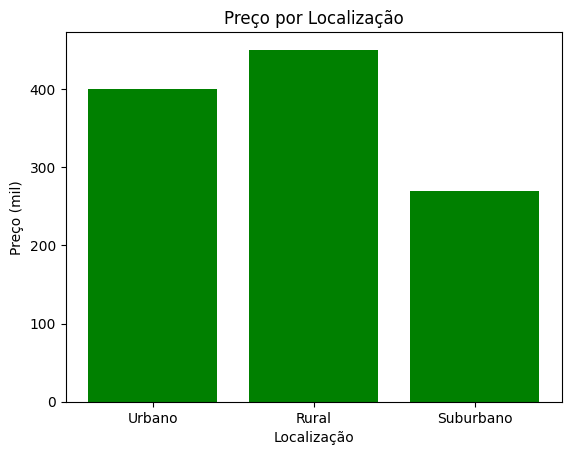

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

data = {
    'Área (m²)': [50, 60, 55, 70, 80],
    'Quartos': [2, 3, 2, 3, 4],
    'Localização': ['Urbano', 'Rural', 'Suburbano', 'Urbano', 'Rural'],  # | 0 RURAL | 1 Suburbano | 2 Urbano |
    'Preço (mil)': [250, 300, 270, 400, 450]
}

# Preparar para o modelo
df = pd.DataFrame(data)

encoder = LabelEncoder()
df['Localização'] = encoder.fit_transform(df['Localização'])


# Separar Features e Target
x = df[['Área (m²)', 'Quartos', 'Localização']]
y = df['Preço (mil)']


# Modelo de Regressão Linear e treinamento
modelo = LinearRegression()
modelo.fit(x, y)
previsao = pd.DataFrame([[70, 2, 0]], columns=['Área (m²)', 'Quartos', 'Localização'])  # Dados com 70 de Área, 2 Quartos e localização Rural
predict = modelo.predict(previsao)


# Inverter a transformação para mostrar o nome ao invés dos números
df['Localização'] = encoder.inverse_transform(df['Localização'])

print(f'O preço previsto para o imóvel é de: {predict[0]:.2f} mil reais')
print(f'\nDetalhes:\n- Área (m²): {previsao.iloc[0]["Área (m²)"]}\n- Quartos: {previsao.iloc[0]["Quartos"]}\n- Localização: {previsao.iloc[0]["Localização"]}\n')


# Gráfico de barras para mostrar o preço por localização
plt.bar(df['Localização'], df['Preço (mil)'], color='green')
plt.title('Preço por Localização')
plt.xlabel('Localização')
plt.ylabel('Preço (mil)')
plt.show()
